
# <p style="text-align: center;">MIS382: Advanced Predictive Modeling</p>
# <p style="text-align: center;">Assignment 3</p>
## <p style="text-align: center;">Total points: 75</p>
## <p style="text-align: center;">Due: Tuesday, October 22nd, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Your partner needs to be from the same section. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTEID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TA know. 

Please ensure that the notebook you have uploaded on Canvas is the correct one, you could download the notebook from Canvas to double check that you have submitted the correct version on your notebook.

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

### Name(s)
1. Edward Eustachon
2. Jeremy Friedman

# Question 1 - Stochastic Gradient Descent (30 pts)

1. (5pts) Using stochastic gradient descent, derive the coefficent updates for all 5 coefficients of the model: $$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3x_1^2x_2^2 + w_4x_2^3$$ Hint: start from the cost function (Assume sum of squared error). If you write the math by hand, include the image in your notebook and upload the image in the submission.


2. (20pts) Write Python code for an SGD solution to the non-linear model$$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3x_1^2x_2^2 + w_4x_2^3$$ Try to format similarly to scikit-learn's models. The template of the class is given. The init function of the class takes as input the learning_rate, regularization_constant and number of epochs. The fit method must take as input X,y and a choice of update_rule as 'sgd' or 'sgd_momentum' or 'Adagrad'. The _predict_ method takes an X value (optionally, an array of values). Use your new gradient descent regression to predict the data given in 'samples.csv', for 15 epochs, using learning rates: [0, .0001, .001, .01, 0.1, 1, 10, 100] and regularization (ridge regression) constants: [0,10,100] . Plot MSE and the $w$ parameters as a function of epoch (for 15 epochs) for the best 2 combinations of learning_rate and regularization for SGD, SGD-Momentum and Adagrad. I.e., you should have one plot of MSE and another for the parameter updates for SGD, SGD-Momentum and Adagrad (6 plots total). (2pts) Report the MSE at the end of 15 epochs for the two best combinations in each of SGD, SGD-Momentum and Adagrad.

Here are two blogs which you can go through to know about Adagrad - [blog 1](https://medium.com/konvergen/an-introduction-to-adagrad-f130ae871827) and [blog 2](http://ruder.io/optimizing-gradient-descent/).


3. (5pts) Based on the experiments, which of the 3 techniques allowed for a larger initial setting of the learning_rate? Why?


## Answer 

### 1.

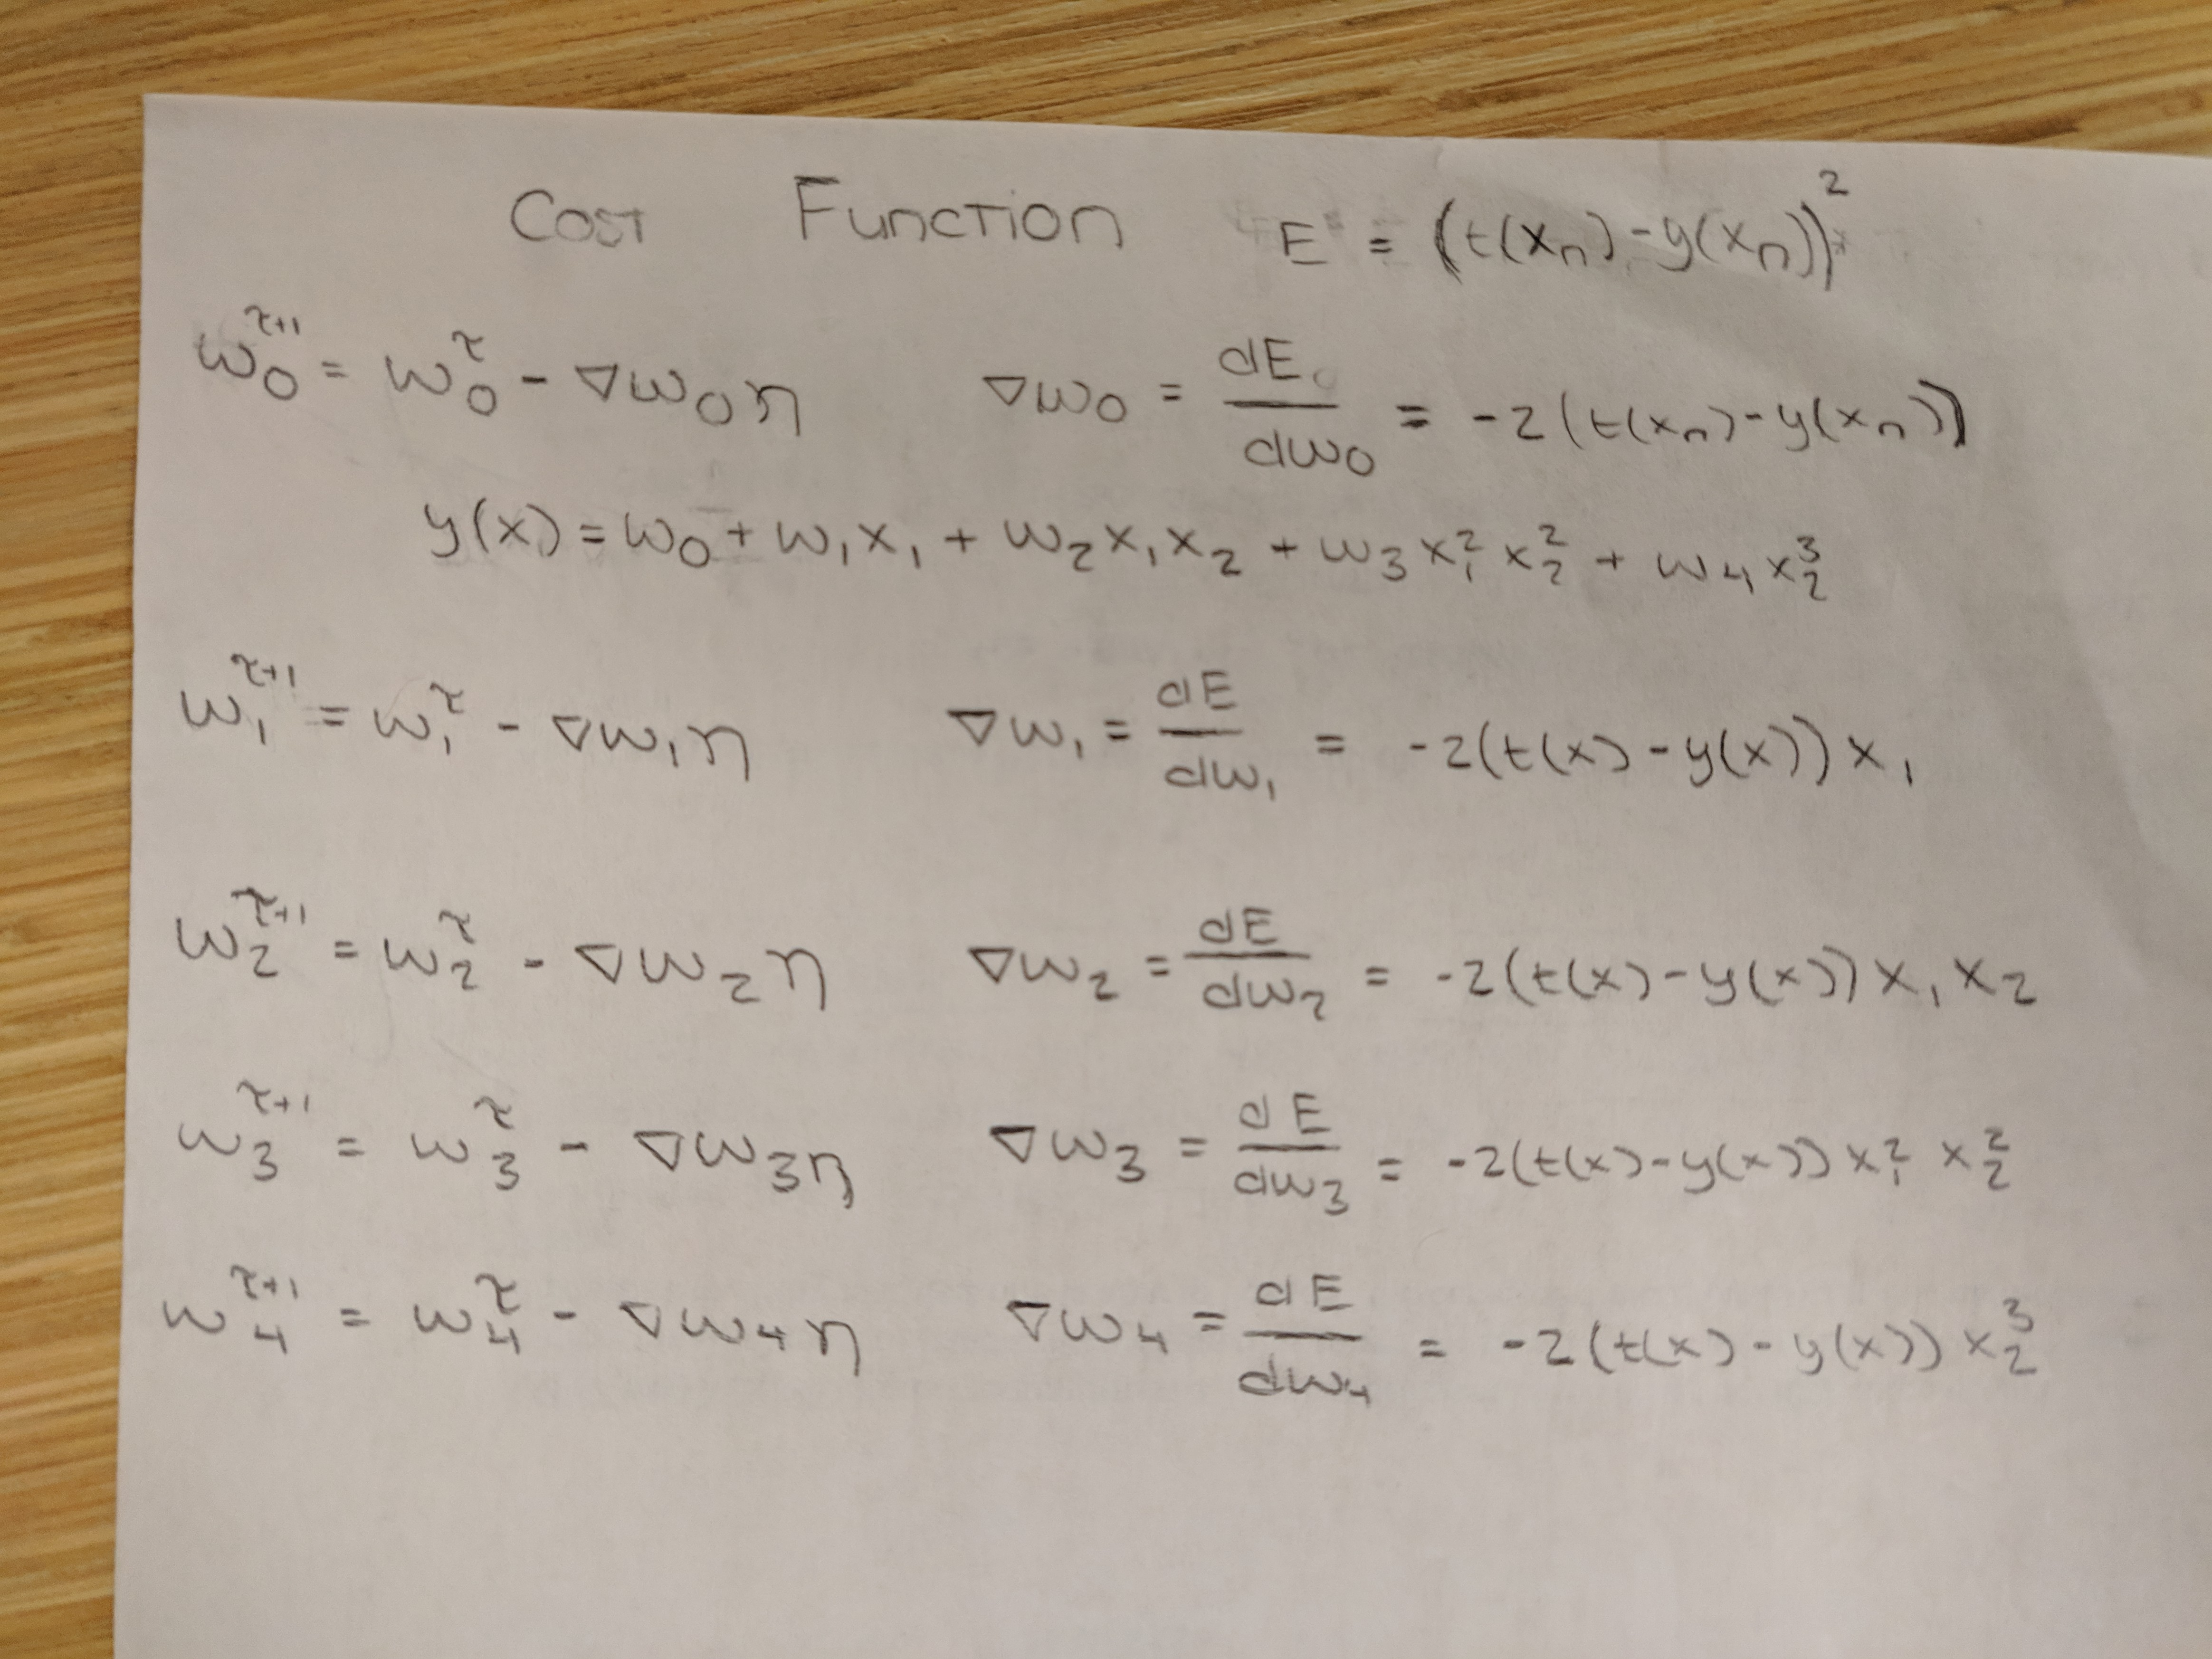

In [31]:
from IPython.display import Image
Image(filename='q1_1.jpg') 

### 2.

In [35]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
import math

class LinearRegression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        self.coef = np.zeros(5) #one coef for each of the terms
        self.eps = 10**-6 #used only for adagrad
        self.cache = np.zeros(self.coef.shape) #used only for adagrad
        self.mu = 0.9 #used in momentum
        self.velocity = 0.0


        
    def sgd(self, gradient):
        self.coef = self.coef - gradient*self.learning_rate
        return self.coef
        '''
        updates self.coef based on gradient using SGD
        '''
    
    def adagrad(self, gradient):
        for i in range(len(self.cache)):
            self.cache[i] += gradient[i]**2
        self.coef = self.coef - self.learning_rate / ((self.eps + self.cache)**0.5) * gradient
        return self.coef
        '''
        updates self.coef based on gradient using Adagrad
        '''
    
    def sgd_momentum(self, gradient):
        self.velocity = self.velocity*self.mu + gradient*self.learning_rate
        self.coef = self.coef - self.velocity
        return self.coef
        '''
        updates self.coef based on gradient using Sgd_momentum
        '''
        
    def fit(self, X, y, update_rule='sgd', plot=False):
        X_features = self.get_features(X)
        MSElist = []
        w0 = []
        w1 = []
        w2 = []
        w3 = []
        w4 = []
        
        for i in range(self.n_epoch):
            for j in range(len(X_features)):
                pred = self.linearPredict(X_features[j])
                scalar = np.array(X_features[j]).T.dot(y[j]-pred)
                gradient = -2*scalar + 2*self.regularization*self.coef
                if update_rule == 'sgd':
                    self.coef = self.sgd(gradient)
                elif update_rule == 'adagrad':
                    self.coef = self.adagrad(gradient)
                else:
                    self.coef = self.sgd_momentum(gradient)
                if y[j]-pred > 100:
                    break
            pred = self.linearPredict(X_features)
            MSE = mean_squared_error(pred, y)
            MSElist.append(MSE)
            w0.append(self.coef[0])
            w1.append(self.coef[1])
            w2.append(self.coef[2])
            w3.append(self.coef[3])
            w4.append(self.coef[4])
            
        if plot:
            plt.plot([i+1 for i in range(self.n_epoch)], MSElist)
            plt.xlabel('Epoch')
            plt.ylabel('MSE')
            plt.title('MSE vs Epoch')
            plt.show()
            plt.plot([i+1 for i in range(self.n_epoch)], w0, label='w0')
            plt.plot([i+1 for i in range(self.n_epoch)], w1, label='w1')
            plt.plot([i+1 for i in range(self.n_epoch)], w2, label='w2')
            plt.plot([i+1 for i in range(self.n_epoch)], w3, label='w3')
            plt.plot([i+1 for i in range(self.n_epoch)], w4, label='w4')
            plt.xlabel('Epoch')
            plt.ylabel('Weight Value')
            plt.legend(loc='best')
            plt.title('Weights vs Epoch')
            plt.show()
            
        pred = self.linearPredict(X_features)
        MSE = mse(pred, y)
        return MSE
        '''
        Fits the model for the given X, y. It uses the update rule mentioned by the parameter update_rule
        and displays a plot of the coefficients vs epochs and mse vs epochs if plot is True. 
        
        -> use get_features to get the features from X
        -> for epoch in epochs:
            iterate through all x, y.
                compute prediction using linearPredict.
                compute gradient.
                pass this gradient to the respective update rule and update the coefficients
                keep track of mse and coefficients
        -> plot if required
        
        '''

    def get_features(self, X):
        X_features = []
        for i in X:
            X_features.append([1, i[0], i[0]*i[1], (i[0]**2)*(i[1]**2), i[1]**3])
        return X_features
        '''
        X (input) is the nx2 dimensional array - n data points with X_1 and X_2.
        It returns a nX5 dimensional array - n data points with 1, X_1, X_1X_2, X_1^2X_2^2, X_2^3.
        '''
        
    def linearPredict(self, X_features):
        return np.matmul(X_features, self.coef)
        '''
        returns the dot product of X and self.coef
        '''

In [36]:
data = pd.read_csv('q1_samples.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 15
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
regularization = [0, 10, 100]

### Using SGD


Best tuning parameters
Learning Rate: 0.001
Regularization: 0
Minimum MSE: 0.020634004333394778


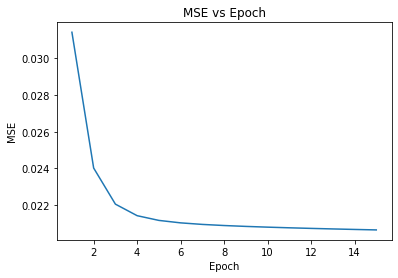

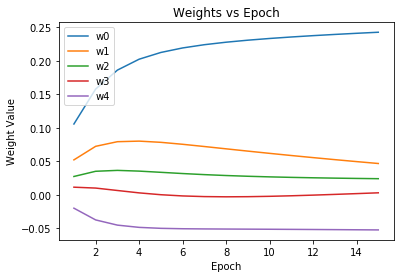

In [37]:
MSElist = []
regu_learn = []
for i in learning_rate:
    for j in regularization:
        SGD = LinearRegression(i, j, n_epochs)
        MSE = SGD.fit(X, y, update_rule='sgd', plot=False)
        regu_learn.append([i, j])
        MSElist.append(MSE)

best = MSElist.index(min(MSElist))
print('Best tuning parameters')
print('Learning Rate: ' + str(regu_learn[best][0]))
print('Regularization: ' + str(regu_learn[best][1]))
print('Minimum MSE: ' + str(min(MSElist)))

SGD = LinearRegression(regu_learn[best][0], regu_learn[best][1], n_epochs)
MSE = SGD.fit(X, y, update_rule='sgd', plot=True)

### Using SGD-Momentum

Best tuning parameters
Learning Rate: 0.001
Regularization: 0
Minimum MSE: 0.02039798653452957


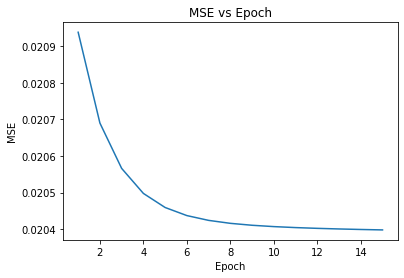

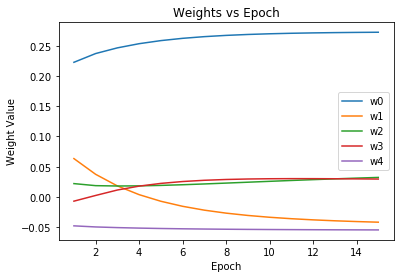

In [38]:
MSElist = []
regu_learn = []
for i in learning_rate:
    for j in regularization:
        momentum = LinearRegression(i, j, n_epochs)
        MSE = momentum.fit(X, y, update_rule='sgd_momentum', plot=False)
        regu_learn.append([i, j])
        MSElist.append(MSE)

best = MSElist.index(min(MSElist))
print('Best tuning parameters')
print('Learning Rate: ' + str(regu_learn[best][0]))
print('Regularization: ' + str(regu_learn[best][1]))
print('Minimum MSE: ' + str(min(MSElist)))

momentum = LinearRegression(regu_learn[best][0], regu_learn[best][1], n_epochs)
MSE = momentum.fit(X, y, update_rule='sgd_momentum', plot=True)

### Using Adagrad

Best tuning parameters
Learning Rate: 0.1
Regularization: 0
Minimum MSE: 0.020236213364767417


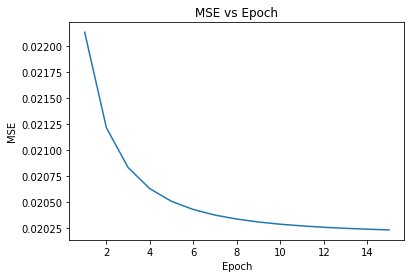

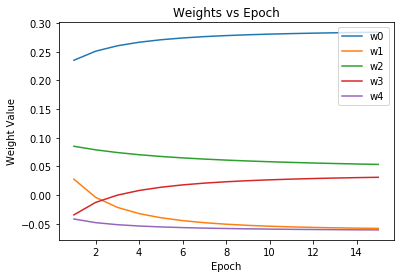

In [39]:
MSElist = []
regu_learn = []
for i in learning_rate:
    for j in regularization:
        SGD = LinearRegression(i, j, n_epochs)
        MSE = SGD.fit(X, y, update_rule='adagrad', plot=False)
        regu_learn.append([i, j])
        MSElist.append(MSE)

best = MSElist.index(min(MSElist))
print('Best tuning parameters')
print('Learning Rate: ' + str(regu_learn[best][0]))
print('Regularization: ' + str(regu_learn[best][1]))
print('Minimum MSE: ' + str(min(MSElist)))

adagrad = LinearRegression(regu_learn[best][0], regu_learn[best][1], n_epochs)
MSE = adagrad.fit(X, y, update_rule='adagrad', plot=True)

### 3.

Ans. Adagrad allows for the largest learning rate. This is because at each step in the descent the learning rate is adapted based on past gradients for every parameter. In SGD, the learning rate remains constant and may result in cases of divergence if the learning rate is too large.


# 2.  Tensor Playground (25pts)
Visit http://playground.tensorflow.org for this problem

From the far right, select "Classification" as the problem type, and select the 4th of the four data sets (the spiral data which is bottom right).  

1) Use the following default settings - test/training ratio 50%, Noise 0, Batch Size 10, learning rate 0.03, one hidden layer with 4 neurons, input as X_1, X_2 and no Regularization. Run two experiments - one using Tanh as the activation function and one using the linear activation function. Report the train, test losses for both these experiments at the end of 1000 epochs(4 values). What difference do you observe in the decision boundary? Why? (4 pts)

2) Use the above setting, set the activation to be Tanh and learning rate to be 0.03. Report the train, test losses at the end of 1000 epochs for 2, 4, and 8 neurons in the hidden layer (6 values). What do you observe in the decision boundary as the number of neurons increases? Why? (4 pts)

3) Use the above setting, set the activation to be Tanh and have four neurons in the hidden layer. Report the train, test losses at the end of 100 epochs and 1000 epochs for learning rates of 3, 0.3, 0.03 and 0.003 (8 values). What do you observe in the loss curves? Explain. (4 pts)

4) Use the above setting, set the activation to be Tanh and learning rate to be 0.03. Use two hidden layers - first hidden layer with 6 neurons and second hidden layer with 4 neurons. Report the train, test values at the end of 2000 epochs (2 values) and attach the screenshot from Tensor playground. Explain the changes you see with this additional hidden layer. (5 pts).

5) Fix the test/training ratio 50% and Noise to 0 (same as before). Play around with any of the other hyperparameters, network architectures and input features (such as $sin(X_1), X_1^2$ etc.) and report the best train/test loss you could get (test loss should be atmost 0.06). Attach the screenshot from  Tensor playground for the same (show your full network, output and parameters). Briefly justify your decisions, and comment on difficulties/tradeoffs, what helps/what doesn't,etc.  (8 pts)
 

### ANSWER

### 1. 


### 2. 

### 3.

### 4.

In [1]:
#PART 2
from IPython.display import Image
# Image("q2_4.png")

### 5.

In [2]:
# Image("q2_5.png")

# Question 3: Decision Trees

1. (5pts) In this question, we will learn to build a Decision Tree classifier. Load the q3_dataset.csv from the files. The column named 'label' is the $Y$ we are trying to predict using the features given in all other columns. As usual, we first split the data in a train and test set and build our model on train set and test the performance on the test set. Use the class tree.DecisionTreeClassifier (http://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree) to fit a model with default parameters and report its performance on the test data. Now, visualize the tree, for visualisation, if your classifier object is called clf, use the given commands to save the generated tree as a '.dot' file using export_graphviz(https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html) and paste the contents of the file in Webgraphviz (http://www.webgraphviz.com/) to generate the tree.


In [ ]:
## read data
data= pd.read_csv('q3_dataset.csv')
x = data.drop(['label'],axis=1)
y = data.label.values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=20)

In [ ]:
## create train/test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=20)

In [ ]:
## save tree as .dot
with open("file_name.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)

2. (10pts) We can guide the learning of a Decision Tree classifier by specifying various parameters governing its construction. For example, the max_depth parameter forces the algorithm to stop after at most that many levels, the min_samples_split parameter lower bounds the amount of data required to split nodes when learning and the parameter called criterion determines what function to use to create splits at each node. For both type of criteria, gini and entropy, test the max_depth values in the range 1, 2, ..., 20 , and min_samples_split in the range $2^{1}, 2^{2}, ..., 2^{15}$. Visualise the best classification trees that you get for different criterion parameter and observe how do they differ. 

## Question 4: Bayes Optimal Classification (5 pts)

1. Consider the following classification problem with only one input feature. We have two biased coins, coin 1 and 2. For coin 1, $P(heads) = p$ and for coin 2, $P(heads) = q$. We know that $p > q$. Given the output of a coin toss, we have to predict which coin was used for this toss. Assume we select both the coins for tossing with equal probability. What is the Bayes optimal classifier and what is its error rate?